In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir('drive')
os.chdir('MyDrive')
os.chdir('Research Project')
os.chdir('Complaints')

Mounted at /content/drive


In [2]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('complaints.csv',index_col=0)
df

,0,1,2,3,4,5,6,7,8,9,...,377,378,379,380,381,382,383,Consumer complaint narrative,Product,label
0,-0.007053,0.036896,-0.062162,0.060747,-0.031190,-0.014175,-0.011366,-0.029301,-0.003502,-0.050387,...,-0.052337,-0.004978,-0.029252,0.038641,-0.013225,-0.040087,-0.038630,My name is XXXX XXXX. I pulled my credit repor...,"Credit reporting, credit repair services, or o...",2
1,-0.085500,0.052140,0.039261,-0.001716,0.040331,-0.026381,0.103406,-0.072089,0.031275,-0.102059,...,-0.034817,-0.050657,0.095110,0.122888,-0.089320,-0.009627,-0.088591,I am becoming more and more frustrated I have ...,"Credit reporting, credit repair services, or o...",2
2,-0.050837,0.005724,-0.080007,0.058624,-0.007886,0.040834,-0.050472,-0.015521,0.078216,-0.039137,...,0.004522,0.005217,-0.028298,-0.053705,-0.060150,0.019633,-0.010169,"After purchasing a copy of my credit report, I...","Credit reporting, credit repair services, or o...",2
3,-0.053147,0.102170,-0.074636,0.022305,0.045990,0.059465,0.075001,-0.039779,0.005551,-0.002273,...,-0.046540,-0.027904,-0.078049,0.071070,0.012554,0.014090,-0.069644,I am writing to delete the following informati...,"Credit reporting, credit repair services, or o...",2
4,-0.108770,0.026251,-0.059413,0.035813,0.009491,0.000758,0.003904,-0.032836,0.036338,-0.014287,...,-0.051305,-0.086661,-0.041804,0.149977,-0.040714,-0.023308,-0.023216,I submitted a dispute on a collection account ...,"Credit reporting, credit repair services, or o...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.048272,0.036304,0.019112,-0.052642,-0.022701,-0.008826,0.012553,0.016953,-0.049602,-0.008039,...,0.059600,0.008215,-0.007710,0.041259,-0.036302,-0.068583,-0.051928,I have dealt with Navient ( and XXXX XXXX ) si...,Student loan,5
14996,-0.046041,-0.014821,0.012117,0.012679,-0.023543,-0.064916,-0.053447,-0.035481,0.034959,-0.076930,...,0.087139,-0.086958,-0.021444,0.061660,-0.061075,-0.067232,-0.014881,Defaulted on my loans from the original compan...,Student loan,5
14997,-0.049317,0.032106,0.039317,-0.035726,-0.000904,-0.073671,-0.007098,-0.015332,0.057714,0.023513,...,0.032381,-0.036337,0.001758,0.009410,-0.047653,-0.031852,-0.069767,"On XX/XX/2019, I learned that my last 3 studen...",Student loan,5
14998,-0.064613,0.064325,0.073982,-0.043781,0.040896,-0.033474,-0.018265,-0.018835,0.015461,-0.019160,...,0.010147,-0.018558,0.003787,0.070301,-0.062143,-0.043200,-0.113735,I initially had my student loans with XXXX XXX...,Student loan,5


In [4]:
X = df.drop(columns=["Product",	"label"])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train_sent = X_train["Consumer complaint narrative"]
X_train_embed = X_train.drop(columns=["Consumer complaint narrative"])
X_test_sent = X_test["Consumer complaint narrative"]
X_test_embed = X_test.drop(columns=["Consumer complaint narrative"])

In [6]:
print(X_train_embed.shape, y_train.shape, X_test_embed.shape, y_test.shape)

(12000, 384) (12000,) (3000, 384) (3000,)


In [7]:
def pca_retain_train(data, expvar =  0.95):
    stdscl = StandardScaler()
    standardized_data = stdscl.fit_transform(data)

    # Create PCA object and fit the standardized data
    pca = PCA()
    pca.fit(standardized_data)

    # Determine the number of components to retain 95% information
    explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(explained_variance_ratio_cumulative >= expvar) + 1

    # Perform PCA with the desired number of components
    pca = PCA(n_components=num_components)
    transformed_data = pca.fit_transform(standardized_data)

    return stdscl, pca, transformed_data

def pca_retain_test(stdscl, pca, data):

    standardized_data = stdscl.transform(data)

    transformed_data = pca.transform(standardized_data)

    return transformed_data

In [8]:
stdscl_full, pca_full, X_train_transformed = pca_retain_train(X_train_embed, expvar =  0.9)
X_valid_transformed = pca_retain_test(stdscl_full, pca_full,X_test_embed)

In [9]:
print(X_train_transformed.shape, X_valid_transformed.shape)

(12000, 158) (3000, 158)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [11]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
fulltfidf_wm_train = tfidfvectorizer.fit_transform(X_train_sent)
fulltfidf_tokens_train = tfidfvectorizer.get_feature_names_out()
fulldf_tfidfvect_train = pd.DataFrame(data = fulltfidf_wm_train.toarray(),columns = fulltfidf_tokens_train)

In [12]:
fulltfidf_wm_valid = tfidfvectorizer.transform(X_test_sent)
fulldf_tfidfvect_valid = pd.DataFrame(data = fulltfidf_wm_valid.toarray(),columns = fulltfidf_tokens_train)

In [13]:
from sklearn.linear_model import LogisticRegression
# We increase `max_iter` to guarantee convergence
lr_clf2 = LogisticRegression(max_iter=3000, penalty='elasticnet', l1_ratio=0.2, solver='saga', random_state=123)
lr_clf2.fit(fulldf_tfidfvect_train, y_train)

LogisticRegression(l1_ratio=0.2, max_iter=3000, penalty='elasticnet',
                   random_state=123, solver='saga')

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
lr_clf2.score(fulldf_tfidfvect_train, y_train)

0.89675

In [16]:
y_train_pred = lr_clf2.predict_proba(fulldf_tfidfvect_train)

In [17]:
roc_auc_score(y_train, y_train_pred, multi_class="ovr", average="micro",)

0.9861752374999999

In [18]:
y_valid_pred = lr_clf2.predict_proba(fulldf_tfidfvect_valid)

In [19]:
roc_auc_score(y_test, y_valid_pred, multi_class="ovr", average="micro",)

0.9755215111111112

In [20]:
labelnames = df[["Product",	"label"]]

In [21]:
label_df = labelnames.groupby(by=["Product"]).agg("max")

In [22]:
label_df

,label
Product,
Checking or savings account,0
Credit card or prepaid card,1
"Credit reporting, credit repair services, or other personal consumer reports",2
Debt collection,3
Mortgage,4
Student loan,5


In [23]:
label_names = label_df.index

In [24]:
label_names

Index(['Checking or savings account', 'Credit card or prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Mortgage', 'Student loan'],
      dtype='object', name='Product')

In [25]:
import matplotlib.pyplot as plt

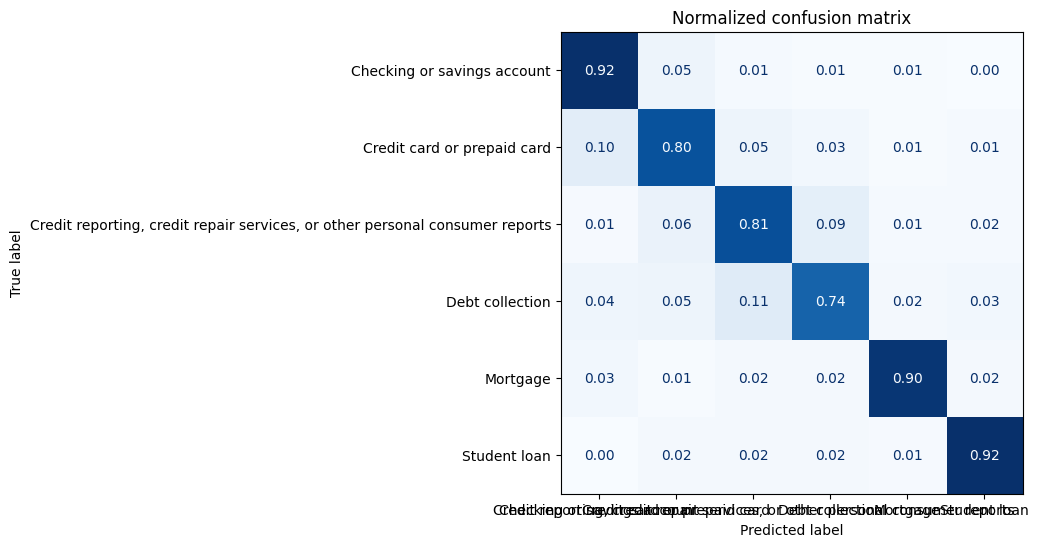

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
 cm = confusion_matrix(y_true, y_preds, normalize="true")
 fig, ax = plt.subplots(figsize=(6, 6))
 disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
 disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
 plt.title("Normalized confusion matrix")
 plt.show()
y_preds = lr_clf2.predict(fulldf_tfidfvect_valid)
plot_confusion_matrix(y_preds, y_test,label_names)

In [27]:
from sklearn.metrics.pairwise import cosine_distances

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
# Calculate cosine similarity for pairwise distances
cosine_distances = pairwise_distances(X_train_transformed, metric='cosine')

In [30]:
# Calculate linkage matrix
# linkage_matrix = linkage(cosine_distances, method='average')

In [31]:
# Plot the dendrogram
# plt.figure(figsize=(10, 6))
# dendrogram(linkage_matrix, leaf_font_size=10)
# plt.title('Agglomerative Clustering Dendrogram')
# plt.xlabel('Sentences')
# plt.ylabel('Cosine Distance')
# plt.xticks(rotation=90)
# plt.show()

In [32]:
# Perform Agglomerative Spectral Clustering
n_clusters = 6 # Number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(cosine_distances)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [33]:
train_df = pd.DataFrame(X_train)
train_df

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,Consumer complaint narrative
9839,-0.083833,0.025042,0.008334,0.000675,-0.042669,-0.012381,0.038461,0.015007,0.046729,-0.020047,...,-0.074246,-0.014981,-0.007861,-0.045914,0.001090,0.086305,-0.073808,0.024158,-0.064357,have been contact the citibank many times in t...
9680,-0.081790,0.148205,-0.042367,0.027756,0.083137,0.024862,0.085368,0.022401,0.043612,-0.055573,...,-0.001004,-0.035695,0.017041,-0.034136,0.039998,0.011655,-0.017303,-0.080850,-0.067527,I have this police report where I stated that ...
7093,-0.044350,-0.026041,-0.006297,0.005036,-0.074694,-0.081422,-0.065680,-0.039237,-0.016127,0.021785,...,-0.052240,0.001966,-0.006022,0.027847,0.032705,0.146138,-0.019185,0.010133,0.031411,"Despite several attempts, my request for the Q..."
11293,-0.056506,0.083530,-0.005044,0.028992,-0.019537,-0.073100,0.057829,-0.014664,0.081014,0.008573,...,-0.066218,0.030878,0.039044,-0.078067,0.029232,0.033195,-0.056825,-0.008719,-0.033704,We are the XXXX XXXX for a XXXX XXXX. On Tuesd...
820,-0.104689,0.054862,-0.051014,-0.000425,0.012914,-0.027044,-0.007013,0.002408,0.011021,-0.026056,...,-0.009210,0.051679,0.029306,-0.057002,0.044272,0.060898,-0.020800,-0.041509,0.045269,XX/XX/XXXX -- - ; Just ended a call with an Ex...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,-0.112513,0.051863,-0.020471,0.017782,0.025972,0.012749,-0.004135,-0.004736,0.040195,0.038702,...,-0.002897,0.033483,-0.005375,0.074497,0.015691,0.034502,-0.086842,-0.070787,0.102940,We have been working with XXXX on a short sale...
13418,-0.062001,0.065009,0.010454,-0.071212,-0.001330,-0.027116,0.004393,-0.032242,0.022440,-0.032508,...,-0.036874,-0.000402,-0.002463,-0.046562,0.014971,0.090554,-0.081978,0.015068,-0.062344,I am currently in Chapter XXXX bankruptcy and ...
5390,-0.004756,-0.039637,0.072436,-0.053156,-0.052933,0.002656,-0.046694,-0.043519,-0.015549,-0.053368,...,0.008078,-0.035415,0.030568,-0.002195,-0.019709,0.044018,0.005256,-0.013465,-0.057967,XX/XX/2021 I have two inquires for a home refi...
860,-0.087219,0.043903,-0.061226,0.007919,0.009599,0.057278,-0.014900,-0.040100,-0.032876,-0.029716,...,0.016430,0.040457,-0.011279,-0.062755,-0.044514,0.123467,-0.008976,-0.039402,0.012657,I have disputed for over a year inaccurate inf...


In [34]:
train_df["Cluster_label"]=cluster_labels
train_df["Product_label"]=y_train
train_df

,0,1,2,3,4,5,6,7,8,9,...,377,378,379,380,381,382,383,Consumer complaint narrative,Cluster_label,Product_label
9839,-0.083833,0.025042,0.008334,0.000675,-0.042669,-0.012381,0.038461,0.015007,0.046729,-0.020047,...,-0.007861,-0.045914,0.001090,0.086305,-0.073808,0.024158,-0.064357,have been contact the citibank many times in t...,2,1
9680,-0.081790,0.148205,-0.042367,0.027756,0.083137,0.024862,0.085368,0.022401,0.043612,-0.055573,...,0.017041,-0.034136,0.039998,0.011655,-0.017303,-0.080850,-0.067527,I have this police report where I stated that ...,1,1
7093,-0.044350,-0.026041,-0.006297,0.005036,-0.074694,-0.081422,-0.065680,-0.039237,-0.016127,0.021785,...,-0.006022,0.027847,0.032705,0.146138,-0.019185,0.010133,0.031411,"Despite several attempts, my request for the Q...",0,4
11293,-0.056506,0.083530,-0.005044,0.028992,-0.019537,-0.073100,0.057829,-0.014664,0.081014,0.008573,...,0.039044,-0.078067,0.029232,0.033195,-0.056825,-0.008719,-0.033704,We are the XXXX XXXX for a XXXX XXXX. On Tuesd...,2,0
820,-0.104689,0.054862,-0.051014,-0.000425,0.012914,-0.027044,-0.007013,0.002408,0.011021,-0.026056,...,0.029306,-0.057002,0.044272,0.060898,-0.020800,-0.041509,0.045269,XX/XX/XXXX -- - ; Just ended a call with an Ex...,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,-0.112513,0.051863,-0.020471,0.017782,0.025972,0.012749,-0.004135,-0.004736,0.040195,0.038702,...,-0.005375,0.074497,0.015691,0.034502,-0.086842,-0.070787,0.102940,We have been working with XXXX on a short sale...,0,4
13418,-0.062001,0.065009,0.010454,-0.071212,-0.001330,-0.027116,0.004393,-0.032242,0.022440,-0.032508,...,-0.002463,-0.046562,0.014971,0.090554,-0.081978,0.015068,-0.062344,I am currently in Chapter XXXX bankruptcy and ...,0,5
5390,-0.004756,-0.039637,0.072436,-0.053156,-0.052933,0.002656,-0.046694,-0.043519,-0.015549,-0.053368,...,0.030568,-0.002195,-0.019709,0.044018,0.005256,-0.013465,-0.057967,XX/XX/2021 I have two inquires for a home refi...,0,4
860,-0.087219,0.043903,-0.061226,0.007919,0.009599,0.057278,-0.014900,-0.040100,-0.032876,-0.029716,...,-0.011279,-0.062755,-0.044514,0.123467,-0.008976,-0.039402,0.012657,I have disputed for over a year inaccurate inf...,1,2


In [35]:
train_df["Cluster_label"].value_counts()

2    3762
1    3758
0    3208
3     611
5     574
4      87
Name: Cluster_label, dtype: int64

In [ ]:
train_df.to_csv("Complaints_train_cluster.csv")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
knn = KNN(n_neighbors=1,metric="precomputed").fit(cosine_distances, train_df["Cluster_label"])

y_cluster_test= knn.predict(pairwise_distances(X_valid_transformed, X_train_transformed, metric='cosine'))

In [ ]:
test_df = pd.DataFrame(X_test)
test_df["Cluster_label"]=y_cluster_test
test_df["Product_label"]=y_test
test_df

In [ ]:
test_df.to_csv("Complaints_test_cluster.csv")

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=3dfbb09a6ce095ad490c42581a26896f318d3e38fb7c674dd0b7aa0f4c98ec09
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=e490c5cccb3ce49394c8e985c13808231e88c05a3743d1bd38d20a8181e511fb
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train_transformed)
# Initialize and fit UMAP
mapper = UMAP(n_components=3, metric="cosine").fit(X_scaled)

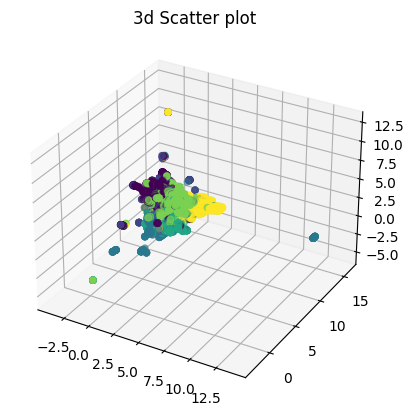

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y", "Z"])
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
z = df_emb.Z
x = df_emb.X
y = df_emb.Y
ax.scatter(x, y, z, c=y_train)

# syntax for plotting
ax.set_title('3d Scatter plot')
plt.show()

In [ ]:
df_emb["label"] = cluster_labels
df_emb.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-9e7481fe201c>", line 1, in <cell line: 1>
    df_emb["label"] = cluster_labels
NameError: name 'df_emb' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPyt

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-9e7481fe201c>", line 1, in <cell line: 1>
    df_emb["label"] = cluster_labels
NameError: name 'df_emb' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-2a34e7750742>", line 2, in <cell line: 2>
    import seaborn as sns
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceba

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df_emb.X, y=df_emb.Y, hue=df_emb.label, palette="tab10", s=70)
plt.title('Cluster Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-a6a646065d49>", line 1, in <cell line: 1>
    sns.set(style="whitegrid")
NameError: name 'sns' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-a6a646065d49>", line 1, in <cell line: 1>
    sns.set(style="whitegrid")
NameError: name 'sns' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interacti

In [ ]:
n_clusters=6
segmented_data_train = []
segmented_sent_train = []
segmented_label_train = []
for cluster_id in range(0,n_clusters,1):
    cluster_points = X_train_embed[train_df.Cluster_label == cluster_id]
    cluster_sents = X_train_sent[train_df.Cluster_label == cluster_id]
    cluster_senti_labels = y_train[train_df.Cluster_label == cluster_id]
    segmented_sent_train.append(cluster_sents)
    segmented_label_train.append(cluster_senti_labels)
    segmented_data_train.append(cluster_points)

In [ ]:
segmented_data_valid = []
segmented_sent_valid = []
segmented_label_valid = []
for cluster_id in range(0,n_clusters,1):
    cluster_points = X_test_embed[test_df.Cluster_label == cluster_id]
    cluster_sents = X_test_sent[test_df.Cluster_label == cluster_id]
    cluster_senti_labels = y_test[test_df.Cluster_label == cluster_id]
    segmented_sent_valid.append(cluster_sents)
    segmented_label_valid.append(cluster_senti_labels)
    segmented_data_valid.append(cluster_points)

In [ ]:
sub_tfidfvectorizer = [None]*6
segmented_fulldf_tfidfvect_train = []
segmented_fulldf_tfidfvect_valid = []
segmented_fulltfidf_tokens_train = []

for i in range(6):
    # We increase `max_iter` to guarantee convergence
    sub_tfidfvectorizer[i] = TfidfVectorizer(analyzer='word',stop_words= 'english')
    fulltfidf_wm_train = sub_tfidfvectorizer[i].fit_transform(segmented_sent_train[i])
    segmented_fulltfidf_tokens_train.append(sub_tfidfvectorizer[i].get_feature_names_out())
    segmented_fulldf_tfidfvect_train.append(pd.DataFrame(data = fulltfidf_wm_train.toarray(),columns = segmented_fulltfidf_tokens_train[i]))
    fulltfidf_wm_valid = sub_tfidfvectorizer[i].transform(segmented_sent_valid[i])
    segmented_fulldf_tfidfvect_valid.append(pd.DataFrame(data = fulltfidf_wm_valid.toarray(),columns = segmented_fulltfidf_tokens_train[i]))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-5a6fe4e1300d>", line 12, in <cell line: 6>
    fulltfidf_wm_valid = sub_tfidfvectorizer[i].transform(segmented_sent_valid[i])
  File "/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py", line 2158, in transform
    return self._tfidf.transform(X, copy=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py", line 1710, in transform
    X = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 565, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 931, in check_array
    raise ValueError(
ValueError: Found array with 0 sample(s) (shape=(0, 398)) while a minimum of 1 is re

In [ ]:
import scipy.sparse as sp

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


class CTFIDFVectorizer(TfidfTransformer):
    def __init__(self, *args, **kwargs):
        super(CTFIDFVectorizer, self).__init__(*args, **kwargs)

    def fit(self, X: sp.csr_matrix, n_samples: int):
        """Learn the idf vector (global term weights) """
        _, n_features = X.shape
        df = np.squeeze(np.asarray(X.sum(axis=0)))
        idf = np.log(n_samples / df)
        self._idf_diag = sp.diags(idf, offsets=0,
                                  shape=(n_features, n_features),
                                  format='csr',
                                  dtype=np.float64)
        return self

    def transform(self, X: sp.csr_matrix) -> sp.csr_matrix:
        """Transform a count-based matrix to c-TF-IDF """
        X = X * self._idf_diag
        X = normalize(X, axis=1, norm='l1', copy=False)
        return X

In [ ]:
Document_train = 6*[None]
Document_test = 6*[None]
for i in range(6):
    Document_train[i] = ' '.join(list(segmented_sent_train[i].values))
    Document_test[i] = ' '.join(list(segmented_sent_valid[i].values))

In [ ]:
# Create c-TF-IDF
count_vectorizer = CountVectorizer().fit(Document_train)
count = count_vectorizer.transform(Document_train)
ctfidf_vectorizer = CTFIDFVectorizer().fit(count, n_samples=12000)
ctfidf = ctfidf_vectorizer.transform(count)

In [ ]:
sub_tfidfvectorizer = [None]*6
segmented_ctfidfvect_train = []
segmented_ctfidfvect_valid = []
segmented_cttfidf_tokens_train = []

for i in range(6):
    count = count_vectorizer.transform(segmented_sent_train[i])
    fulltfidf_wm_train = ctfidf_vectorizer.transform(count)
    segmented_ctfidfvect_train.append(pd.DataFrame(data = fulltfidf_wm_train.toarray()))
    count = count_vectorizer.transform(segmented_sent_valid[i])
    fulltfidf_wm_train = ctfidf_vectorizer.transform(count)
    segmented_ctfidfvect_valid.append(pd.DataFrame(data = fulltfidf_wm_train.toarray()))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-e81814368c14>", line 11, in <cell line: 6>
    fulltfidf_wm_train = ctfidf_vectorizer.transform(count)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "<ipython-input-42-34eea557bfb6>", line 25, in transform
    X = normalize(X, axis=1, norm='l1', copy=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py", line 1817, in normalize
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 931, in check_array
    raise ValueError(
ValueError: Found array with 0 sample(s) (shape=(0, 22148)) while a minimum of 1 is required by the normalize function.

During handling of the above exception, a

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
sub_lr_clf_ctfidf = [None]*6
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]  # l1_ratio specifies the balance between L1 (Lasso) and L2 (Ridge) penalties in the ElasticNet
}

for i in range(6):
  logreg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000)
  sub_lr_clf_ctfidf[i] = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc_ovr')
  sub_lr_clf_ctfidf[i].fit(segmented_ctfidfvect_train[i], segmented_label_train[i])
  print(sub_lr_clf_ctfidf[i].score(segmented_ctfidfvect_train[i], segmented_label_train[i]), sub_lr_clf_ctfidf[i].score(segmented_ctfidfvect_valid[i], segmented_label_valid[i]))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-68bbec540e35>", line 11, in <cell line: 8>
    sub_lr_clf_ctfidf[i].fit(segmented_ctfidfvect_train[i], segmented_label_train[i])
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
sub_lr_clf2 = [None]*4

for i in range(4):
    # We increase `max_iter` to guarantee convergence
    sub_lr_clf2[i] = LogisticRegression(max_iter=3000, penalty='elasticnet', l1_ratio=0.1, solver='saga', random_state=123)
    sub_lr_clf2[i].fit(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i])
    print(sub_lr_clf2[i].score(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i]), sub_lr_clf2[i].score(segmented_fulldf_tfidfvect_valid[i], segmented_label_valid[i]))

0.925703500343171 0.8353265869365225
0.9445882962195753 0.8540880503144654
0.735632183908046 0.38095238095238093
0.8708860759493671 0.711340206185567


In [ ]:
sub_lr_clf3 = [None]*4

for i in range(4):
    # We increase `max_iter` to guarantee convergence
    sub_lr_clf3[i] = LogisticRegression(max_iter=3000, penalty='elasticnet', l1_ratio=0, solver='saga', random_state=123)
    sub_lr_clf3[i].fit(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i])
    print(sub_lr_clf3[i].score(segmented_fulldf_tfidfvect_train[i], segmented_label_train[i]), sub_lr_clf3[i].score(segmented_fulldf_tfidfvect_valid[i], segmented_label_valid[i]))

0.9408888126286891 0.8261269549218031
0.9549456240290005 0.8477987421383648
0.8045977011494253 0.38095238095238093
0.8962025316455696 0.6907216494845361


In [ ]:
df = pd.DataFrame(columns=['Overall Train','Logistic Reg Train','Overall Test','Logistic Reg Test'], index=['cluster1', 'cluster2', 'cluster3', 'cluster4'])

In [ ]:
df.loc['cluster1'] = pd.Series({'Overall Train': lr_clf2.score(fulldf_tfidfvect_train[df_emb.label == -1], segmented_label_train[0]),
            'Logistic Reg Train': sub_lr_clf[0].score(segmented_fulldf_tfidfvect_train[0], segmented_label_train[0]),
            'Overall Test': lr_clf2.score(fulldf_tfidfvect_valid[y_cluster_valid == -1], segmented_label_valid[0]),
            'Logistic Reg Test': sub_lr_clf[0].score(segmented_fulldf_tfidfvect_valid[0], segmented_label_valid[0])})

In [ ]:
df.loc['cluster2'] = pd.Series({'Overall Train': lr_clf2.score(fulldf_tfidfvect_train[df_emb.label == 0], segmented_label_train[1]),
            'Logistic Reg Train': sub_lr_clf[1].score(segmented_fulldf_tfidfvect_train[1], segmented_label_train[1]),
            'Overall Test': lr_clf2.score(fulldf_tfidfvect_valid[y_cluster_valid == 0], segmented_label_valid[1]),
            'Logistic Reg Test': sub_lr_clf[1].score(segmented_fulldf_tfidfvect_valid[1], segmented_label_valid[1])})

df.loc['cluster3'] = pd.Series({'Overall Train': lr_clf2.score(fulldf_tfidfvect_train[df_emb.label == 1], segmented_label_train[2]),
            'Logistic Reg Train': sub_lr_clf3[2].score(segmented_fulldf_tfidfvect_train[2], segmented_label_train[2]),
            'Overall Test': lr_clf2.score(fulldf_tfidfvect_valid[y_cluster_valid == 1], segmented_label_valid[2]),
            'Logistic Reg Test': sub_lr_clf3[2].score(segmented_fulldf_tfidfvect_valid[2], segmented_label_valid[2])})

df.loc['cluster4'] = pd.Series({'Overall Train': lr_clf2.score(fulldf_tfidfvect_train[df_emb.label == 2], segmented_label_train[3]),
            'Logistic Reg Train': sub_lr_clf2[3].score(segmented_fulldf_tfidfvect_train[3], segmented_label_train[3]),
            'Overall Test': lr_clf2.score(fulldf_tfidfvect_valid[y_cluster_valid == 2], segmented_label_valid[3]),
            'Logistic Reg Test': sub_lr_clf2[3].score(segmented_fulldf_tfidfvect_valid[3], segmented_label_valid[3])})
df

,Overall Train,Logistic Reg Train,Overall Test,Logistic Reg Test
cluster1,0.913778,0.911376,0.853726,0.846366
cluster2,0.95624,0.934749,0.916981,0.859119
cluster3,0.91954,0.804598,0.952381,0.380952
cluster4,0.962025,0.870886,0.948454,0.71134


In [ ]:
print('Overall Training Accuracy = ' + str(lr_clf2.score(fulldf_tfidfvect_train, y_train)))
print('Overall Testing Accuracy = ' + str(lr_clf2.score(fulldf_tfidfvect_valid, y_valid)))


Overall Training Accuracy = 0.92525
Overall Testing Accuracy = 0.8845


In [ ]:
for i in range(4):
    print(segmented_fulldf_tfidfvect_train[i].shape, segmented_fulldf_tfidfvect_valid[i].shape)

(11656, 14363) (1087, 14363)
(3862, 3031) (795, 3031)
(87, 150) (21, 150)
(395, 494) (97, 494)


In [ ]:
# Use AUC instead of accuracy.***
# Covariance matrix and partial corelation.
#  Sample size and generalization
# Look for better metrics to compare.***
# CTFIDF

In [ ]:
1 "TF-IDF
2 Neural network
